In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# Read the excel file sent by Moy Hin
file_path = r"C:\Users\Gabriel\Documents\Motiro\Asia-Pacific_Volunteer_Survey_2025-05-10_Motiro.xlsx"
df = pd.read_excel(file_path)
# Display the last rows of the dataframe to verify successful loading
df.tail()

# STEP 1.1 : recoding Moti answers from string to integer in order to compute scores and means

# Define the mapping of categorical values to integers
mapping = {
    'Strongly disagree': 1,
    'Somewhat disagree': 2,
    'Neutral': 3,
    'Somewhat agree': 4,
    'Strongly agree': 5
}

# transform the categorical Moti column into integers using the mapping from column 10 to column 33
# 10 to 33 = 24 columns 

# Find all columns that match the mapping keys (i.e., contain Likert scale answers)
likert_columns = [col for col in df.columns if set(mapping.keys()) & set(df[col].unique()) or any(isinstance(x, str) and x in mapping for x in df[col].unique())]

for col in likert_columns:
    df[col] = df[col].replace(mapping)
    df[col] = pd.to_numeric(df[col], errors='coerce')

#replace string values with real numbers 1-7 to compute means for frequency variable, by teams
# At my volunteer activity, I feel strong and vigorous      column[34]     
# I feel emotionally drained from my work.                  column[35]     
# I feel frustrated by my work.                             column[36]  

mapping = {
    "Every time": 7,
    "Very often": 6,
    "Often": 5,
    "Sometimes": 4,
    "Rarely": 3,
    "Almost never": 2,
    "Never": 1
} 

df['At my volunteer activity, I feel strong and vigorous.'] = df['At my volunteer activity, I feel strong and vigorous.'].replace(mapping)
df['I feel emotionally drained from my volunteer activity.'] = df['I feel emotionally drained from my volunteer activity.'].replace(mapping)
df['I feel frustrated by my volunteer activity.'] = df['I feel frustrated by my volunteer activity.'].replace(mapping)

df.head()

# STEP 1.2 : Create the Moti scores for each dimension, e.g. autonomy, belonging, etc.
#  Before computing the well-being score: 
#  recode the two following columns so that the positive outcomes get the higher scores
# 'I feel emotionally drained from my volunteer activity.
# 'I feel frustrated by my volunteer activity.

mapping = {
    7: 1,
    6: 2,
    5: 3,
    4: 4,
    3: 5,
    2: 6,
    1: 7
}

df['I feel emotionally drained from my volunteer activity.'] = df['I feel emotionally drained from my volunteer activity.'].replace(mapping)
df['I feel frustrated by my volunteer activity.'] = df['I feel frustrated by my volunteer activity.'].replace(mapping)

# Specify the column names for Well-being
column_names = [
    'At my volunteer activity, I feel strong and vigorous.',
    'I feel emotionally drained from my volunteer activity.',
    'I feel frustrated by my volunteer activity.'
]

# Calculate the mean row by row and assign it to a new column 'Well-being'
df['Well-being'] = df[column_names].mean(axis=1)

# Rescale the 'Well-being' values from a range of 1-7 to 1-5 and rounds the result
df['Well-being'] = (df['Well-being'] - 1) * (4 / 6) + 1
df['Well-being'] = df['Well-being'].round(1)

## recode back to original values for the two "negative" variables
#  after computing the well-being score for "logical" correlation analysis
#  we need to recode the two following columns so that the negative outcomes get the higher scores
# 'I feel emotionally drained from my volunteer activity.
# 'I feel frustrated by my volunteer activity.

mapping = {
    7: 1,
    6: 2,
    5: 3,
    4: 4,
    3: 5,
    2: 6,
    1: 7
}

df['I feel emotionally drained from my volunteer activity.'] = df['I feel emotionally drained from my volunteer activity.'].replace(mapping)
df['I feel frustrated by my volunteer activity.'] = df['I feel frustrated by my volunteer activity.'].replace(mapping)


# Specify the column names for Engagement
column_names = [
    'If I could choose, I will be volunteering one year from now.',
    'The team has a great deal of personal meaning for me.',
    'Considering everything, I am satisfied with my volunteer activity.',
    'I share my ideas with others to improve the team.',
    'The things that I value in life are very similar to the things that the team values.'
]

# Calculate the mean row by row and assign it to a new column 'Engagement'
df['Engagement'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for Autonomy
column_names = [
    'I feel like I can be myself at my volunteer activity.',
    'The tasks I do at my volunteer activity are in line with what I really want to do.',
    'I am free to express my ideas and opinions on the volunteer activity.'
]

# Calculate the mean row by row and assign it to a new column 'Autonomy'
df['Autonomy'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for belonging
column_names = [
    'At my volunteer activity, I feel part of a group.',
    'At my volunteer activity, I can talk with people about things that really matter to me.',
    'People at my volunteer activity care about me.'
]

# Calculate the mean row by row and assign it to a new column 'Belonging'
df['Belonging'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for Competence
column_names = [
    'I really master my tasks at my volunteer activity.',
    'I feel competent at my volunteer activity.'
]

# Calculate the mean row by row and assign it to a new column 'Competence'
df['Competence'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for Needs
column_names = [
    'I feel like I can be myself at my volunteer activity.',
    'The tasks I do at my volunteer activity are in line with what I really want to do.',
    'I am free to express my ideas and opinions on the volunteer activity.',
    'At my volunteer activity, I feel part of a group.',
    'At my volunteer activity, I can talk with people about things that really matter to me.',
    'People at my volunteer activity care about me.',
    'I really master my tasks at my volunteer activity.',
    'I feel competent at my volunteer activity.'
]

# Calculate the mean row by row and assign it to a new column 'Needs'
df['Needs'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for Leadership
column_names = [
    'My supervisor listens to how I would like to do things.',
    'I feel understood by my supervisor.',
    'My supervisor encourages me to ask questions.'
]

# Calculate the mean row by row and assign it to a new column 'Leadership'
df['Leadership'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for 'Management'
column_names = [
    'I have the opportunity to develop my social network in my volunteer activity.',
    'I have been able to learn interesting new skills on my volunteer activity.',
    'I am fairly rewarded considering the responsibilities I have.',
    'I am fairly rewarded for the work I do well.',
    'My family, friends and my neighborhood appreciate the work I do for the team.',
    'I feel my work has positive impact on other people.'
]

# Calculate the mean row by row and assign it to a new column 'Management'
df['Management'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for 'Returns'
column_names = [
    'I have the opportunity to develop my social network in my volunteer activity.',
    'I have been able to learn interesting new skills on my volunteer activity.'
]

# Calculate the mean row by row and assign it to a new column 'Returns'
df['Returns'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for 'Rewards'
column_names = [
    'I am fairly rewarded considering the responsibilities I have.',
    'I am fairly rewarded for the work I do well.'
]

# Calculate the mean row by row and assign it to a new column 'Rewards'
df['Rewards'] = df[column_names].mean(axis=1).round(1)

# Specify the column names for 'Status'
column_names = [
    'My family, friends and my neighborhood appreciate the work I do for the team.',
    'I feel my work has positive impact on other people.'
]

# Calculate the mean row by row and assign it to a new column 'Status'
df['Status'] = df[column_names].mean(axis=1).round(1)


# STEP 1.3 : Rename columns 10 to 36 in their abridged form
# Define the new column names
# The first 10 columns are not changed, so we keep them as is   
# The next columns are renamed according to the provided list
cols_to_update = [
    'Myself',
    'Tasks',
    'Free',
    'Mastery',
    'Competent',
    'Learn',
    'Group',
    'Talk',
    'Care',
    'Satisfied',
    'Meaning',
    'Stay',
    'Ideas',
    'Values',
    'Understands',
    'Encourages',
    'Listens',
    'Network',
    'Friendly',
    'Team',
    'Appreciated',
    'Responsibilities',
    'Work',
    'Impact',
    'Strong',
    'Drained',
    'Frustrated'
    ]
# Make sure the number of columns matches the number of new names
num_cols_to_rename = len(cols_to_update)
# Create a dictionary to map old column names to new ones
new_column_names = {df.columns[i]: cols_to_update[i-10] for i in range(10, 10 + num_cols_to_rename)}
# Update the DataFrame's columns
df.rename(columns=new_column_names, inplace=True)
# Display the updated DataFrame to verify the changes


# STEP 2 : Replace column names with their abbreviations
# Define the mapping of full column names to their abbreviations
abbreviation_mapping = {
    'How long have you been volunteering for the Red Cross Red Crescent National Society?': 'How long?',
    'What is your age group?': 'Age',
    'Which Red Cross Red Crescent National Society do you belong?': 'NS',
    'Are you also volunteering elsewhere?': 'Elsewhere',
    'When was the last time you joined a Red Cross Red Crescent National Society activity?': 'Last time',
    'Have you volunteered for other organisations before?': 'Other org',
    'Do you volunteer in urban or rural area or both?': 'Urban/Rural',
    'What is your gender?': 'Gender',
    'What is your highest level of education?': 'Education',
    'Which of the following best describes your current employment status?': 'Employment',
    'Do you identify yourself as a person forcedly displaced from your home due to crisis?': 'Displaced',
}
# Replace the full column names with their abbreviations
df.rename(columns=abbreviation_mapping, inplace=True)  

#change the names of columns 78 to 85 by deleting from the column name the following string:
# 'What make your involvement with the Red Cross Red Crescent National Society a personal success? (select all that apply)/'
# Column names containing this string are from 78 to 85
# Define the string to be removed
string_to_remove = 'What make your involvement with the Red Cross Red Crescent National Society a personal success? (select all that apply)/'
# Iterate over the columns and remove the string from the names
for col in df.columns[78:86]:
    if string_to_remove in col:
        new_col_name = col.replace(string_to_remove, '')
        df.rename(columns={col: new_col_name}, inplace=True)
# Remove leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

# Display the updated DataFrame to verify the changes
df.head()

df.info()
df.to_csv('AsiaPacific_ALL.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Columns: 236 entries, _id to Status
dtypes: datetime64[ns](1), float64(62), int64(84), object(89)
memory usage: 13.8+ MB


In [ ]:
# STEP 3: create dataframe where one row is one NS
df = pd.read_csv('AsiaPacific_ALL.csv')

#Select the columns to keep
columns_to_keep = [
    'NS',
    'How long?',
    'Age',
    'Gender',
    'Elsewhere',
    'Last time',
    'Other org',
    'Urban/Rural',
    'Education',
    'Employment',
    'Displaced',
    'Myself',
    'Tasks',
    'Free',
    'Mastery',
    'Competent',
    'Learn',
    'Group',
    'Talk',
    'Care',
    'Satisfied',
    'Meaning',
    'Stay',
    'Ideas',
    'Values',
    'Understands',
    'Encourages',
    'Listens',
    'Network',
    'Friendly',
    'Team',
    'Appreciated',
    'Responsibilities',
    'Work',
    'Impact',
    'Strong',
    'Drained',
    'Frustrated',
    'Well-being',
    'Engagement',
    'Autonomy',
    'Belonging',
    'Competence',
    'Needs',
    'Leadership',
    'Management',
    'Returns',
    'Rewards',
    'Status'
]

# Create a new DataFrame with only the selected columns
df = df[columns_to_keep]

# Display the updated DataFrame to verify the changes
df.info()

# STEP 3.5  Save DataFrame
df.to_csv('AsiaPacific_short_ALL.csv', index=False)

# STEP 4 : Create a DataFrame with the mean and median for each NS
# Create list of columns for which to compute the mean and median for each NS
mean_columns = [
    'Myself',
    'Tasks',
    'Free',
    'Mastery',
    'Competent',
    'Learn',
    'Group',
    'Talk',
    'Care',
    'Satisfied',
    'Meaning',
    'Stay',
    'Ideas',
    'Values',
    'Understands',
    'Encourages',
    'Listens',
    'Network',
    'Friendly',
    'Team',
    'Appreciated',
    'Responsibilities',
    'Work',
    'Impact',
    'Strong',
    'Drained',
    'Frustrated',
    'Well-being',
    'Engagement',
    'Autonomy',
    'Belonging',
    'Competence',
    'Needs',
    'Leadership',
    'Management',
    'Returns',
    'Rewards',
    'Status'
]

# STEP 3.1 Group rows by 'NS' and calculate size (count) for each NS
mean_df = df.groupby('NS')[mean_columns].mean().round(1).reset_index()
median_df = df.groupby('NS')[mean_columns].median().reset_index()
# Display the mean and median DataFrames
mean_df.info()
median_df.info()

# STEP 3.2  Merge the mean and median DataFrames
df = df.merge(mean_df, on='NS', suffixes=('_mean', '_median')).merge(median_df, on='NS', suffixes=('_mean', '_median'))
# Display the merged DataFrame
df.info()
# STEP 3.3  Create a DataFrame with the size (count) for each NS
NS_df = df.groupby('NS').size().reset_index(name='count')
# Display the size DataFrame
NS_df.info()

# STEP 3.4 Merge the size DataFrame with the mean and median DataFrames 
NS_df = NS_df.merge(mean_df, on='NS', suffixes=('_mean', '_median')).merge(median_df, on='NS', suffixes=('_mean', '_median'))
# Display the merged DataFrame
NS_df.info()

# STEP 3.5  Save DataFrame
NS_df.to_csv('AsiaPacific_NS.csv', index=False)



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_11880\249525120.py:2: DtypeWarning: Columns (189,190,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AsiaPacific_ALL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NS                7637 non-null   object 
 1   How long?         7637 non-null   object 
 2   Age               7637 non-null   object 
 3   Gender            7637 non-null   object 
 4   Elsewhere         7637 non-null   object 
 5   Last time         7637 non-null   object 
 6   Other org         7637 non-null   object 
 7   Urban/Rural       7637 non-null   object 
 8   Education         7637 non-null   object 
 9   Employment        7637 non-null   object 
 10  Displaced         7637 non-null   object 
 11  Myself            7636 non-null   float64
 12  Tasks             7636 non-null   float64
 13  Free              7636 non-null   float64
 14  Mastery           7636 non-null   float64
 15  Competent         7636 non-null   float64
 16  Learn             7636 non-null   float64


In [5]:
# Create cross tabulations of Moti scores and key demographic variables
# Read the CSV file
df = pd.read_csv('AsiaPacific_ALL.csv')

#Create list of columns containing demographic data for tabulation
demographic_columns = [
    'How long?',
    'Age',
    'NS',
    'Elsewhere',
    'Last time',
    'Other org',
    'Urban/Rural',
    'Education',
    'Employment',
    'Displaced',
    'Gender',
]

# Create list of columns containing Moti scores for tabulation
moti_columns = [
    'Myself',
    'Tasks',
    'Free',
    'Mastery',
    'Competent',
    'Learn',
    'Group',
    'Talk',
    'Care',
    'Satisfied',
    'Meaning',
    'Stay',
    'Ideas',
    'Values',
    'Understands',
    'Encourages',
    'Listens',
    'Network',
    'Friendly',
    'Team',
    'Appreciated',
    'Responsibilities',
    'Work',
    'Impact',
]

# Create cross tabulations of demographic variables and Moti scores
# include percentage of each category formated to one decimal point
# and compute X2 test for independence
for demographic in demographic_columns:
    for moti in moti_columns:
        crosstab = pd.crosstab(df[demographic], df[moti], margins=True, margins_name="Total", normalize='index')
        # Display the cross tabulation
        print(f"Cross tabulation of {demographic} and {moti}:")
        print(crosstab)
        print("\n")
        # Compute the Chi-squared test for independence
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Chi-squared test for {demographic} and {moti}:")
        print(f"Chi2: {chi2}, p-value: {p}, degrees of freedom: {dof}")
        print("\n")




C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21240\2201820676.py:3: DtypeWarning: Columns (189,190,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AsiaPacific_ALL.csv')


Cross tabulation of How long? and Myself:
Myself                   1.0       2.0       3.0       4.0       5.0
How long?                                                           
1-3 years           0.016374  0.010783  0.158946  0.197284  0.616613
4-5 years           0.015564  0.011673  0.137160  0.160506  0.675097
6-10 years          0.015588  0.016787  0.136691  0.176259  0.654676
Less than 1 year    0.018679  0.015639  0.258036  0.182450  0.525195
More than 10 years  0.023760  0.017562  0.115702  0.177686  0.665289
Total               0.017810  0.013882  0.177973  0.183080  0.607255


Chi-squared test for How long? and Myself:
Chi2: 0.11228018315371326, p-value: 1.0, degrees of freedom: 20


Cross tabulation of How long? and Tasks:
Tasks                    1.0       2.0       3.0       4.0       5.0
How long?                                                           
1-3 years           0.016773  0.018371  0.143770  0.228435  0.592652
4-5 years           0.017510  0.013619  0.11770

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21240\814385909.py:3: DtypeWarning: Columns (189,190,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AsiaPacific_ALL.csv')


Cross tabulation of I don't feel any success and Myself:
Myself                         1.0       2.0       3.0       4.0       5.0
I don't feel any success                                                  
0                         0.014718  0.012792  0.174140  0.185282  0.613067
1                         0.079235  0.035519  0.254098  0.139344  0.491803
Total                     0.017810  0.013882  0.177973  0.183080  0.607255


Chi-squared test for I don't feel any success and Myself:
Chi2: 0.13139671812222595, p-value: 0.9999992634436334, degrees of freedom: 8


Cross tabulation of I don't feel any success and Tasks:
Tasks                          1.0       2.0       3.0       4.0       5.0
I don't feel any success                                                  
0                         0.013893  0.015131  0.158597  0.236176  0.576204
1                         0.079235  0.040984  0.224044  0.254098  0.401639
Total                     0.017025  0.016370  0.161734  0.237035  0.5678

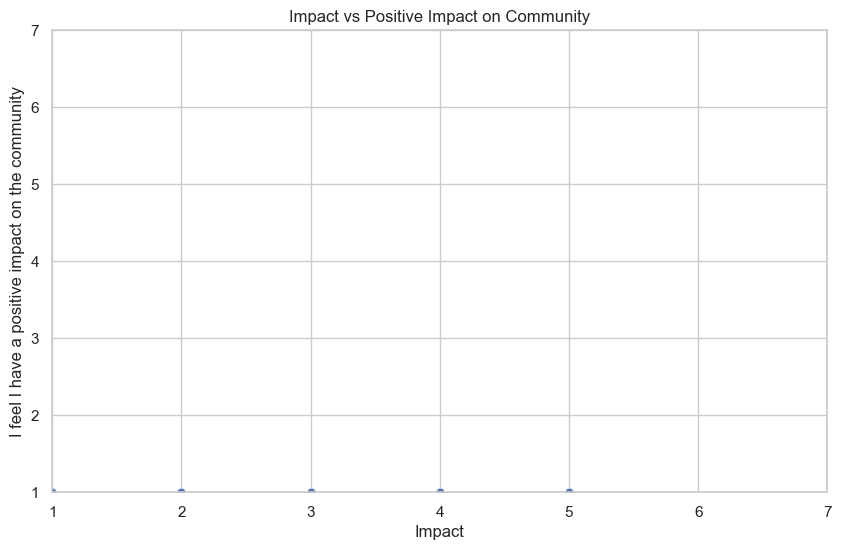

In [ ]:
# Create cross tabulations of Moti scores and similar survey variables
# Read the CSV file
df = pd.read_csv('AsiaPacific_ALL.csv')

#Create list of columns containing demographic data for tabulation
success_columns = [
    "I don't feel any success",
    'I feel I have a positive impact on the community',
    'I learn new skills',
    'I have new experiences',
    'I meet new people and improve relationships',
    'People in Red Cross Red Crescent recognise and value my contribution',
    'I have been offered a job either from or through my Red Cross Red Crescent network'
]

# Create list of columns containing Moti scores for tabulation
moti_columns = [
    'Myself',
    'Tasks',
    'Free',
    'Mastery',
    'Competent',
    'Learn',
    'Group',
    'Talk',
    'Care',
    'Satisfied',
    'Meaning',
    'Stay',
    'Ideas',
    'Values',
    'Understands',
    'Encourages',
    'Listens',
    'Network',
    'Friendly',
    'Team',
    'Appreciated',
    'Responsibilities',
    'Work',
    'Impact',
]

# Create cross tabulations of success variables and Moti scores
# include percentage of each category formated to one decimal point
# and compute X2 test for independence
for success in success_columns:
    for moti in moti_columns:
        crosstab = pd.crosstab(df[success], df[moti], margins=True, margins_name="Total", normalize='index')
        # Display the cross tabulation
        print(f"Cross tabulation of {success} and {moti}:")
        print(crosstab)
        print("\n")
        # Compute the Chi-squared test for independence
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Chi-squared test for {success} and {moti}:")
        print(f"Chi2: {chi2}, p-value: {p}, degrees of freedom: {dof}")
        print("\n")





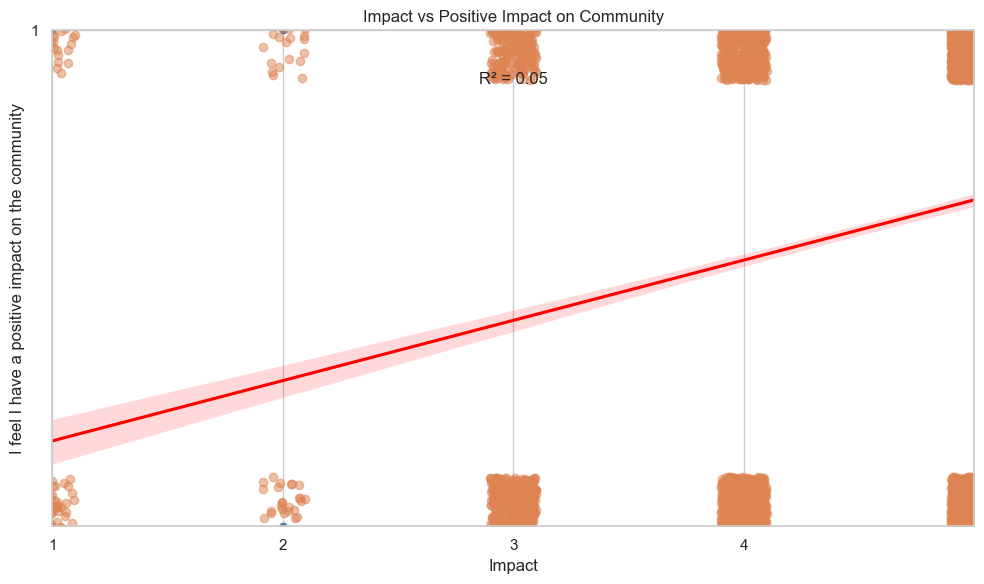

In [ ]:
#create scatter plot where x axis is "Impact" and y axis is 'I feel I have a positive impact on the community'
import matplotlib.pyplot as plt
import seaborn as sns  
df = pd.read_csv('AsiaPacific_ALL.csv')

# Set the style of seaborn
sns.set(style="whitegrid")
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impact', y='I feel I have a positive impact on the community', alpha=0.6)
plt.title('Impact vs Positive Impact on Community')
plt.xlabel('Impact')
plt.ylabel('I feel I have a positive impact on the community')
plt.xlim(1, 5)
plt.ylim(0, 1)
plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(1, 2, 1))
plt.grid(True)
jitter = 0.1
plt.scatter(df['Impact'] + np.random.uniform(-jitter, jitter, size=len(df)), 
            df['I feel I have a positive impact on the community'] + np.random.uniform(-jitter, jitter, size=len(df)), 
            alpha=0.5)
# Add a regression line
sns.regplot(data=df, x='Impact', y='I feel I have a positive impact on the community', scatter=False, color='red')
# Add regression line equation and R-squared value
from sklearn.linear_model import LinearRegression
X = df[['Impact']]
y = df['I feel I have a positive impact on the community']
# Drop rows with NaN in X or y
mask = X.notna().squeeze() & y.notna()
X_clean = X[mask]
y_clean = y[mask]
model = LinearRegression()
model.fit(X_clean, y_clean)
r_squared = model.score(X_clean, y_clean)
plt.text(0.5, 0.9, f'R² = {r_squared:.2f}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
# Show the plot
plt.tight_layout()
plt.show()

In [22]:
df = pd.read_csv('AsiaPacific_ALL.csv')

#create dummy variables for the Moti categorical variables (Moti_columns)
moti_columns = [
    'Myself',
    'Tasks',
    'Free',
    'Mastery',
    'Competent',
    'Learn',
    'Group',
    'Talk',
    'Care',
    'Satisfied',
    'Meaning',
    'Stay',
    'Ideas',
    'Values',
    'Understands',
    'Encourages',
    'Listens',
    'Network',
    'Friendly',
    'Team',
    'Appreciated',
    'Responsibilities',
    'Work',
    'Impact',
]

# Create new dummy variables for each Moti column where var=1 if column >=3 else 0
# New dummy variables will be named as the original column name with "_dummy" suffix
for col in moti_columns:
    df[col + '_dummy'] = np.where(df[col] >= 3, 1, 0)

# Tabulate the new dummy variables with the original categorical column
# Create cross tabulations of Moti dummy variables and themselves


for moti in moti_columns:
    crosstab = pd.crosstab(df[moti], df[moti + '_dummy' ], margins=True, margins_name="Total", normalize='index')
    # Display the cross tabulation
    print(f"Cross tabulation of {moti} and {moti + '_dummy'}:")
    print(crosstab)
    print("\n")
    # Compute the Chi-squared test for independence
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-squared test for {moti} and {moti + '_dummy'}:")
    print(f"Chi2: {chi2}, p-value: {p}, degrees of freedom: {dof}")
    print("\n")

# Compute odds ratios for each Moti dummy variable against 'I feel I have a positive impact on the community'
# Create a new DataFrame to store the odds ratios
odds_ratios = pd.DataFrame(columns=['Variable', 'Odds Ratio', '95% CI Lower', '95% CI Upper'])
# Create a new DataFrame to store the odds ratios
for moti in moti_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[moti + '_dummy'], df['I feel I have a positive impact on the community'])
    # Calculate the odds ratio
    odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
    # Calculate the confidence intervals
    ci_lower = np.exp(np.log(odds_ratio) - 1.96 * np.sqrt(1/contingency_table.iloc[0, 0] + 1/contingency_table.iloc[0, 1] + 1/contingency_table.iloc[1, 0] + 1/contingency_table.iloc[1, 1]))
    ci_upper = np.exp(np.log(odds_ratio) + 1.96 * np.sqrt(1/contingency_table.iloc[0, 0] + 1/contingency_table.iloc[0, 1] + 1/contingency_table.iloc[1, 0] + 1/contingency_table.iloc[1, 1]))
    # Append the results to the DataFrame
    odds_ratios = odds_ratios.append({'Variable': moti, 'Odds Ratio': odds_ratio, '95% CI Lower': ci_lower, '95% CI Upper': ci_upper}, ignore_index=True)
# Display the odds ratios DataFrame
print(odds_ratios)
# Save the odds ratios DataFrame to a CSV file
#odds_ratios.to_csv('odds_ratios.csv', index=False)


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21240\1440448912.py:1: DtypeWarning: Columns (189,190,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AsiaPacific_ALL.csv')


Cross tabulation of Myself and Myself_dummy:
Myself_dummy         0         1
Myself                          
1.0           1.000000  0.000000
2.0           1.000000  0.000000
3.0           0.000000  1.000000
4.0           0.000000  1.000000
5.0           0.000000  1.000000
Total         0.031692  0.968308


Chi-squared test for Myself and Myself_dummy:
Chi2: 5.862974236057635, p-value: 0.31978132086425626, degrees of freedom: 5


Cross tabulation of Tasks and Tasks_dummy:
Tasks_dummy         0         1
Tasks                          
1.0          1.000000  0.000000
2.0          1.000000  0.000000
3.0          0.000000  1.000000
4.0          0.000000  1.000000
5.0          0.000000  1.000000
Total        0.033394  0.966606


Chi-squared test for Tasks and Tasks_dummy:
Chi2: 5.8559260715131085, p-value: 0.3204913672506255, degrees of freedom: 5


Cross tabulation of Free and Free_dummy:
Free_dummy         0         1
Free                          
1.0         1.000000  0.000000
2.0   

AttributeError: 'DataFrame' object has no attribute 'append'